In [15]:
import numpy as np

class Stock:
    def __init__(self, symbol, expected_return, volatility, current_price):
        self.symbol = symbol
        self.expected_return = expected_return
        self.volatility = volatility
        self.current_price = current_price
    
    def get_price_after_years(self, t=None, seed=None, size=None):
        if seed is not None:
            np.random.seed(seed)
        
        z = np.random.normal(0, 1, size=size) #표준 정규 분포 N(0,1)에서 샘플 생성
        
        future_price = self.current_price * np.exp((self.expected_return - 0.5*self.volatility**2) * t+self.volatility * np.sqrt(t) * z)
        
        return future_price
    
stock = Stock("samsung", 0.04, 0.3, 100) # samsung 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100
future_price = stock.get_price_after_years(t=5, seed=5015, size=22)
print(future_price)

[133.2381559   98.73799424 219.15168055 152.51546384 189.0550116
 164.42456717 109.63270413 211.52546841 100.21372165 131.89105456
 119.59073491 310.05711248 187.72471234 125.66067741 154.88574598
 110.98632045 169.22255199 122.35118297 123.15723851  87.94946239
  90.24626155 113.47638779]


In [20]:
import numpy as np

class Stock:
    def __init__(self, symbol, expected_return, volatility, current_price):
        self.symbol = symbol
        self.expected_return = expected_return
        self.volatility = volatility
        self.current_price = current_price
    
    def get_price_after_years(self, t=None, seed=None, size=None):
        if seed is not None:
            np.random.seed(seed)
        
        z = np.random.normal(0, 1, size=size) #표준 정규 분포 N(0,1)에서 샘플 생성
        
        future_price = self.current_price * np.exp((self.expected_return - 0.5*self.volatility**2) * t+self.volatility * np.sqrt(t) * z)
        
        return future_price
    
    def get_sample_statistics(self, t=None, seed=None, size=None):
        future_prices = self.get_price_after_years(t=t, seed=seed, size=size)
        sample_mean = np.mean(future_prices)
        sample_variance = np.var(future_prices)
        return sample_mean, sample_variance


stock = Stock("samsung", 0.04, 0.3, 100) # samsung 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100
sample_mean, sample_variance = stock.get_sample_statistics(t=5, seed=5015, size=10)
print(f"표본평균1: {sample_mean}")
print(f"표본분산1: {sample_variance}")

stock = Stock("samsung", 0.04, 0.3, 100) # samsung 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100
sample_mean, sample_variance = stock.get_sample_statistics(t=5, seed=5015, size=1000)
print(f"표본평균2: {sample_mean}")
print(f"표본분산2: {sample_variance}")

stock = Stock("samsung", 0.04, 0.3, 100) # samsung 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100
sample_mean, sample_variance = stock.get_sample_statistics(t=5, seed=5015, size=100000)
print(f"표본평균3: {sample_mean}")
print(f"표본분산3: {sample_variance}")

#5년후의 표본평균을 기대수익, 변동성, 현재가격을 각각 0.04, 0.3, 100으로 잡고 계산했을 때 표본평균은 122.140275816이 나온다
#5년후의 표본분산을 기대수익, 변동성, 현재가격을 각각 0.04, 0.3, 100으로 잡고 계산했을 때 표본분산은 8478.22154285이 나온다


표본평균1: 87.26202448049602
표본분산1: 1298.0313214886282
표본평균2: 125.61750062694406
표본분산2: 11351.71404322902
표본평균3: 122.83550113438955
표본분산3: 8544.062799717198


In [22]:
class InvestmentOption:
    def __init__(self, name, expected_return_good, expected_return_bad, probability_good):
        self.name = name
        self.expected_return_good = expected_return_good
        self.expected_return_bad = expected_return_bad
        self.probability_good = probability_good
    
    def calculate_expected_return(self):
        return self.probability_good * self.expected_return_good + (1 - self.probability_good) * self.expected_return_bad
    
    def calculate_variance(self):
        variance_good = self.probability_good * (self.expected_return_good - self.calculate_expected_return())**2
        variance_bad = (1 - self.probability_good) * (self.expected_return_bad - self.calculate_expected_return())**2
        return variance_good + variance_bad


# 투자안 생성
option_a = InvestmentOption("A", 0.08, -0.02, 0.7)
option_b = InvestmentOption("B", 0.1, -0.05, 0.5)
option_c = InvestmentOption("C", 0.06, -0.01, 0.6)

# 기대수익률과 분산 계산
investments = [option_a, option_b, option_c]
for investment in investments:
    expected_return = investment.calculate_expected_return()
    variance = investment.calculate_variance()
    print(f"{investment.name}: Expected Return = {expected_return}, Variance = {variance}")

# 수익률의 분산이 작을 수록 안전한 투자이므로 수익률의 분산이 작은 순서로 정렬
sorted_investments = sorted(investments, key=lambda x: x.calculate_variance())
print("Investment options sorted by variance:")
for investment in sorted_investments:
    print(f"{investment.name}: Variance = {investment.calculate_variance()}")


A: Expected Return = 0.049999999999999996, Variance = 0.0021000000000000003
B: Expected Return = 0.025, Variance = 0.0056250000000000015
C: Expected Return = 0.032, Variance = 0.001176
Investment options sorted by variance:
C: Variance = 0.001176
A: Variance = 0.0021000000000000003
B: Variance = 0.0056250000000000015


[ 70.27558941  44.83199118 148.24456673  86.06615413 118.78014982
  96.34110829  52.45317321 140.57418531  45.84081849  69.21250824
  59.75962715 249.47333016 117.5286502   64.36661522  88.08029384
  53.42761123 100.58864025  61.84062016  62.45273908  37.68871763
  39.17467549  55.23569607  49.00457932  80.82537336 109.32143425
  11.43804545  36.19501343 255.60730657  42.43165521  47.39918051
  65.23825375  60.87951468 124.45400837  53.20254161  76.87422981
 145.23681845 107.45619769 166.70850982  57.60739731  85.75374881
 162.99908967  84.99794982  91.06317758  30.0629166   78.28104267
  77.95230503  56.35233019  65.61152334  53.22426177 106.9811842
 187.1550831  590.14038283  84.9685644  123.48920874  46.88262382
  32.3702305   60.99148273  93.64778901 294.35679342  13.54044405
  43.11259    113.92958091  29.63804653 140.70373871 273.6922448
 113.49480182 111.9019498   98.02842438 173.85801897 276.86133664
  59.67674278  58.21959875 166.04810365 163.84445363 122.61209189
  54.8413024

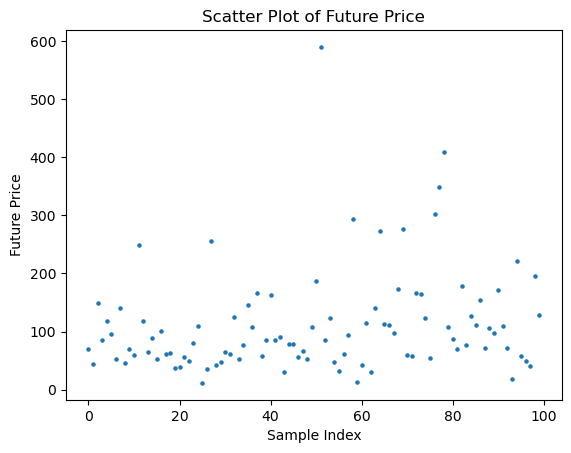

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Stock:
    def __init__(self, symbol, expected_return, volatility, current_price):
        self.symbol = symbol
        self.expected_return = expected_return
        self.volatility = volatility
        self.current_price = current_price
    
    def get_price_after_years(self, t=None, seed=None, size=None):
        if seed is not None:
            np.random.seed(seed)
        
        z = np.random.normal(0, 1, size=size) #표준 정규 분포 N(0,1)에서 샘플 생성
        
        future_price = self.current_price * np.exp((self.expected_return - 0.5*self.volatility**2) * t+self.volatility * np.sqrt(t) * z)
        
        return future_price
    
stock = Stock("samsung", 0.04, 0.3, 100) # samsung 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100
future_price = stock.get_price_after_years(t=5, seed=5015, size=100)
print(future_price)

# 산포도 그리기
plt.scatter(range(len(future_price)), future_price, s=5)
plt.xlabel('Sample Index')
plt.ylabel('Future Price')
plt.title('Scatter Plot of Future Price')
plt.show()


In [39]:
import numpy as np

class Stock:
    def __init__(self, symbol, expected_return, volatility, current_price, net_income):
        self.symbol = symbol
        self.expected_return = expected_return
        self.volatility = volatility
        self.current_price = current_price
        self.net_income = net_income
    
    def get_price_after_years(self, t=None, seed=None, size=None):
        if seed is not None:
            np.random.seed(seed)
        
        z = np.random.normal(0, 1, size=size)  # 표준 정규 분포 N(0,1)에서 샘플 생성
        
        future_price = self.current_price * np.exp((self.expected_return - 0.5*self.volatility**2) * t + self.volatility * np.sqrt(t) * z)
        
        return future_price
    
    def PER(self):
        return self.current_price / self.net_income

stock = Stock("samsung", 0.04, 0.3, 100, 5000)  # 삼성 주식, 기대 수익률 0.04, 변동성 0.3, 현재 가격 100, 당기순이익 5000
future_price = stock.get_price_after_years(t=5, seed=5015, size=22)
print(future_price)

print(stock.PER())


[ 70.27558941  44.83199118 148.24456673  86.06615413 118.78014982
  96.34110829  52.45317321 140.57418531  45.84081849  69.21250824
  59.75962715 249.47333016 117.5286502   64.36661522  88.08029384
  53.42761123 100.58864025  61.84062016  62.45273908  37.68871763
  39.17467549  55.23569607]
0.02
